In [3]:
%matplotlib inline


# Plotting WAV Files in Time and Frequency


In this notebook I import a WAV file (in this case a song) and plot it in time and frequency (using the `fftpack.fft` function from scipy). This is part of a larger idea I'm investigating.

In [21]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
from scipy.io import wavfile # get the api

## Plotting the signal in the time domain

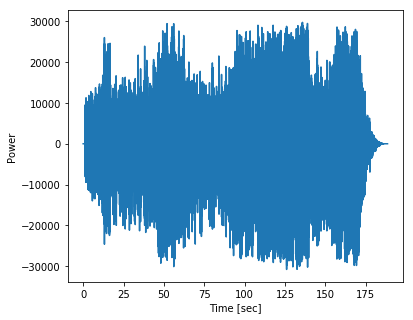

In [23]:
#fs, sig = wavfile.read("Dancing in the Moonlight.wav")
fs, sig = wavfile.read("Looking Glass - Brandy (You're a Fine Girl).wav")

# This song has two channels, so I just want the first (they are very similar)
# If I tried to take the FFT of the entire signal it would never complete, so I needed to concatenate it slightly
sig0 = sig.T[0][:len(sig) - int(len(sig)%10000)]

time_step = 1/fs
time_vec = np.arange(0, len(sig0)/fs, time_step)

plt.figure(figsize=(6, 5))
plt.xlabel('Time [sec]')
plt.ylabel('Power')
plt.plot(time_vec, sig0, label='Original signal')

## Plotting the signal in the frequency domain

Note: The human ear can hear between 20 and 20,000 Hz, hence the x axis.

Text(0,0.5,'power')

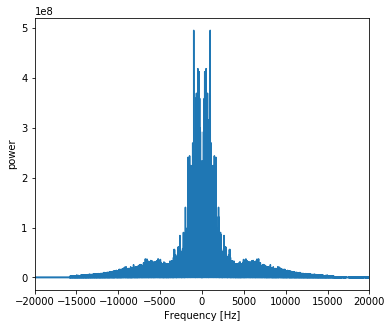

In [24]:
# The FFT of the signal
sig_fft = fftpack.fft(sig0)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(len(sig_fft), d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlim(-20000, 20000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')